In [118]:
#Importing Libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import pickle

In [7]:
count = 0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/' +dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count = count + len(files)
print('Images Folder has ' + str(count) + ' Images')

.ipynb_checkpoints Folder has 0 Images
daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folder has 4317 Images


In [13]:
#Load Images into array as Dataset
base_dir = 'Images/'
img_size = 180
batch = 32

In [15]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset='training',
                                                       batch_size=batch, image_size=(img_size, img_size))


validation_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset='validation',
                                                       batch_size=batch, image_size=(img_size, img_size))


Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [19]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

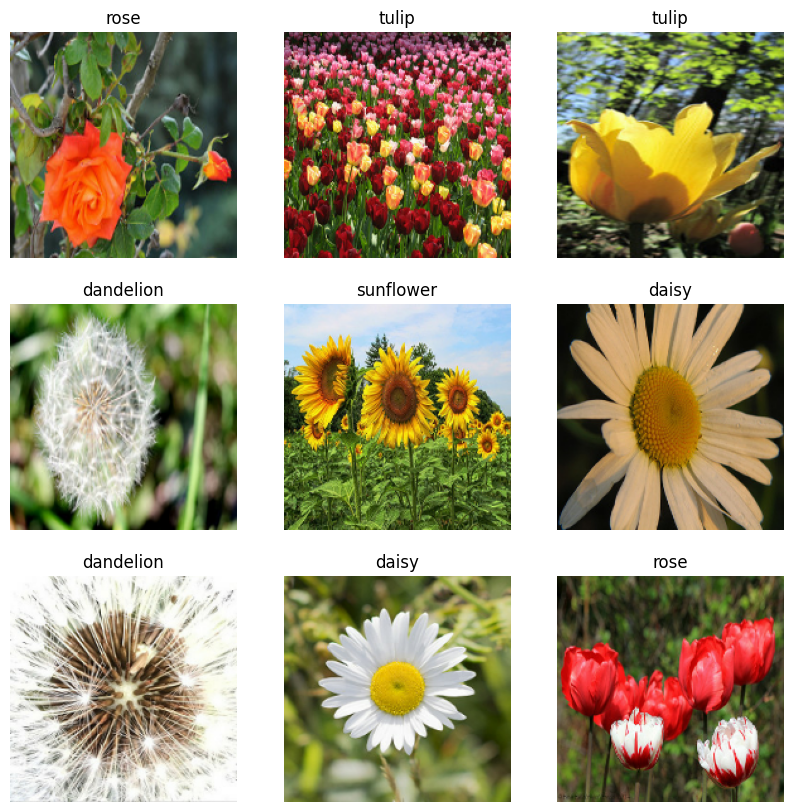

In [25]:
plt.figure(figsize=(10,10))
i = 0
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')       

In [31]:
AUTOTUNE = tf.data.AUTOTUNE

In [33]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [49]:
#Data Augumentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

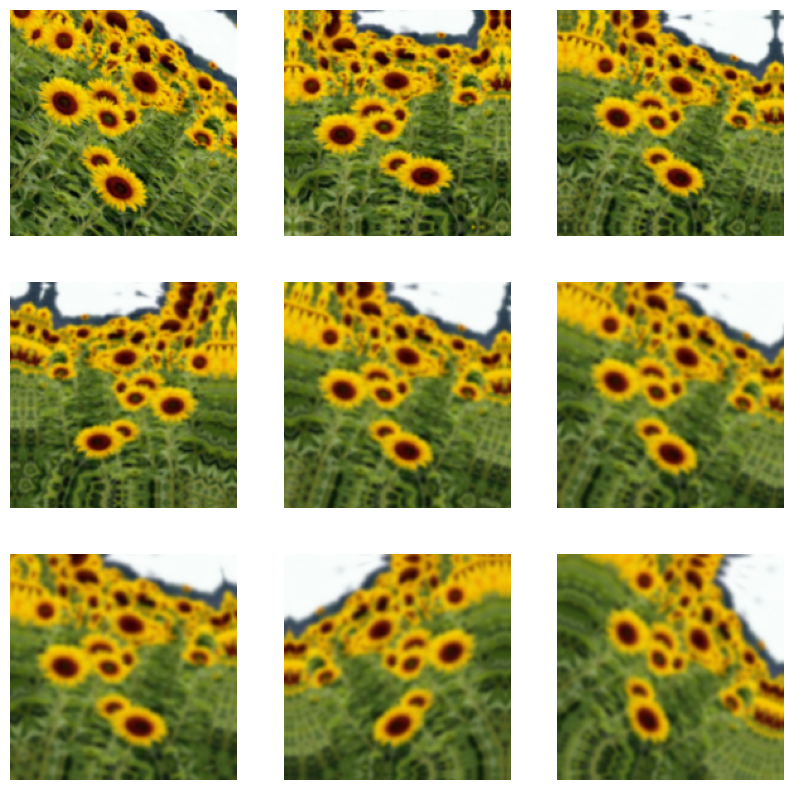

In [58]:
i = 0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')  

In [ ]:
# Model Creation

In [76]:
model = tf.keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16,3,padding = 'same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3,padding = 'same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding = 'same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [82]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                                                                 metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 180, 180, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 90, 90, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 90, 90, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 45, 45, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 45, 45, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 22, 22, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (32, 22, 22, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 30976)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 128)                   │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 5)                     │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
history = model.fit(train_ds, epochs=15, validation_data = validation_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 52s 452ms/step - accuracy: 0.3600 - loss: 1.4571 - val_accuracy: 0.5632 - val_loss: 1.0484
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 40s 373ms/step - accuracy: 0.6007 - loss: 1.0322 - val_accuracy: 0.5933 - val_loss: 1.0667
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 339ms/step - accuracy: 0.6241 - loss: 0.9673 - val_accuracy: 0.6396 - val_loss: 0.9459
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 346ms/step - accuracy: 0.6755 - loss: 0.8654 - val_accuracy: 0.6501 - val_loss: 0.8881
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 51s 474ms/step - accuracy: 0.6911 - loss: 0.8194 - val_accuracy: 0.6721 - val_loss: 0.8344
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 51s 470ms/step - accuracy: 0.7129 - loss: 0.7768 - val_accuracy: 0.6964 - val_loss: 0.7664
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 45s 420ms/step - accuracy: 0.7404 - loss: 0.6996 - val_accuracy: 0.6941 - val_loss: 0.7744
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 45s 418ms/step - accuracy: 0.7260 - loss: 0

In [111]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size =(180,180))
    input_img_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_img_array, 0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0]) 
    outcome = 'The image belongs to ' + flower_names[np.argmax(result)] + ' with a score of ' + str(np.max(result*100))
    return outcome

In [113]:
classify_images('Sample/sunflower.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


'The image belongs to sunflower with a score of 34.314445'

In [126]:
model.save('Flower_Recog_model.keras')